# Contributions to Happiness 

The dataset contains country-wise happiness scores, rankings and extent to which various factors contributing to a country's happiness. 
The dataset is dataser is taken from kaggle: https://www.kaggle.com/unsdsn/world-happiness 
There are 6 factors listed:
1. Economy (GDP per Capita)
2. Family
3. Health (Life Expectancy)
4. Freedom
5. Trust (Government Corruption)
6. Generosity 
<br>other factors are put into the 'Dystopia Residual'.
The addition of above 7 qualities makes the happiness score of region-wise coutries given. The rank is predicted on the basis of the happiness score.


In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/unsdsn/world-happiness' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: juhiaggarwal
Your Kaggle Key: ········


100%|██████████| 36.8k/36.8k [00:00<00:00, 1.37MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './world-happiness'

In [6]:
import os
os.listdir(data_dir)

['2018.csv', '2016.csv', '2017.csv', '2019.csv', '2015.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "contributing-to-happiness" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jaggarwal1/contributing-to-happiness" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jaggarwal1/contributing-to-happiness


'https://jovian.ai/jaggarwal1/contributing-to-happiness'



## Data Preparation and Cleaning


The main processing is done using 2015 data.




In [144]:
import pandas as pd
import numpy as np
data1_df = pd.read_csv('world-happiness/2015.csv')
data1_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [12]:
data1_df
#calucating contribution of individual factcors in the Happiness score
data1_df['GDP-contri'] = data1_df["Economy (GDP per Capita)"]/data1_df["Happiness Score"]
data1_df['Fam-contri'] = data1_df["Family"]/data1_df["Happiness Score"]
data1_df['Health-contri'] = data1_df["Health (Life Expectancy)"]/data1_df["Happiness Score"]
data1_df['Freedom-contri'] = data1_df["Freedom"]/data1_df["Happiness Score"]
data1_df['Govt-contri'] = data1_df["Trust (Government Corruption)"]/data1_df["Happiness Score"]
data1_df['Gen-contri'] = data1_df["Generosity"]/data1_df["Happiness Score"]
data1_df['Others'] = data1_df["Dystopia Residual"]/data1_df["Happiness Score"]

In [13]:
data1_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'GDP-contri', 'Fam-contri',
       'Health-contri', 'Freedom-contri', 'Govt-contri', 'Gen-contri',
       'Others'],
      dtype='object')

In [14]:
workinga = data1_df[['Country','Region','Happiness Rank','Generosity', 'Dystopia Residual', 'GDP-contri', 'Fam-contri',
       'Health-contri', 'Freedom-contri', 'Govt-contri', 'Gen-contri', 'Others' ]]
workinga.columns = workinga.columns.str.replace(" ", "-")

In [15]:
workinga

,Country,Region,Happiness-Rank,Generosity,Dystopia-Residual,GDP-contri,Fam-contri,Health-contri,Freedom-contri,Govt-contri,Gen-contri,Others
0,Switzerland,Western Europe,1,0.29678,2.51738,0.184066,0.177871,0.124085,0.087725,0.055329,0.039117,0.331802
1,Iceland,Western Europe,2,0.43630,2.70201,0.172242,0.185456,0.125359,0.083160,0.018708,0.057704,0.357361
2,Denmark,Western Europe,3,0.34139,2.49204,0.176097,0.180760,0.116200,0.086273,0.064245,0.045355,0.331080
3,Norway,Western Europe,4,0.34699,2.46531,0.193964,0.176941,0.117683,0.089036,0.048528,0.046130,0.327747
4,Canada,North America,5,0.45811,2.45176,0.178577,0.178081,0.121938,0.085226,0.044375,0.061682,0.330114
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,0.22628,0.67042,0.064092,0.223290,0.123706,0.170854,0.159281,0.065304,0.193483
154,Benin,Sub-Saharan Africa,155,0.18260,1.63328,0.085823,0.105946,0.095539,0.145060,0.023982,0.054671,0.489006
155,Syria,Middle East and Northern Africa,156,0.47179,0.32858,0.220625,0.157981,0.240163,0.052176,0.062894,0.156949,0.109308
156,Burundi,Sub-Saharan Africa,157,0.19727,1.83302,0.005267,0.143157,0.077095,0.040792,0.034637,0.067907,0.630988


In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jaggarwal1/contributing-to-happiness" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jaggarwal1/contributing-to-happiness


'https://jovian.ai/jaggarwal1/contributing-to-happiness'

## Exploratory Analysis and Visualization

Let us try to figure out the how the 6 listed factors contribute in the ranking and what is the trend followed.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [19]:
workinga.shape

(158, 12)

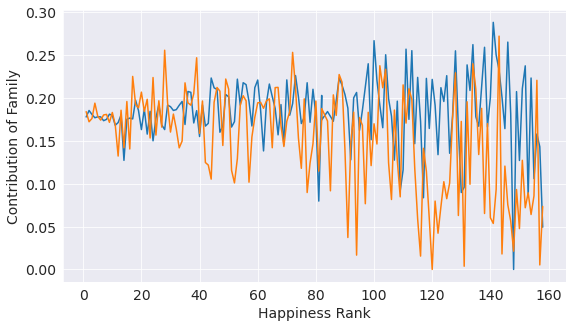

In [134]:
plt.plot(workinga['Happiness-Rank'], workinga['Fam-contri'])
plt.plot(workinga['Happiness-Rank'], workinga['GDP-contri'])
plt.xlabel('Happiness Rank')
plt.ylabel('Contribution of Family');

The first graph that we try plotting is line graph, which does not seem to give a nice corelation between contribution of the family to the Happiness ranking. The contribution factor is rather more abruot for countries ranking greater than 100.



**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [21]:
workinga.columns

Index(['Country', 'Region', 'Happiness-Rank', 'Generosity',
       'Dystopia-Residual', 'GDP-contri', 'Fam-contri', 'Health-contri',
       'Freedom-contri', 'Govt-contri', 'Gen-contri', 'Others'],
      dtype='object')

Let us tryout the scatter plots for each of the contributing factors to the Happiness Ranking. 


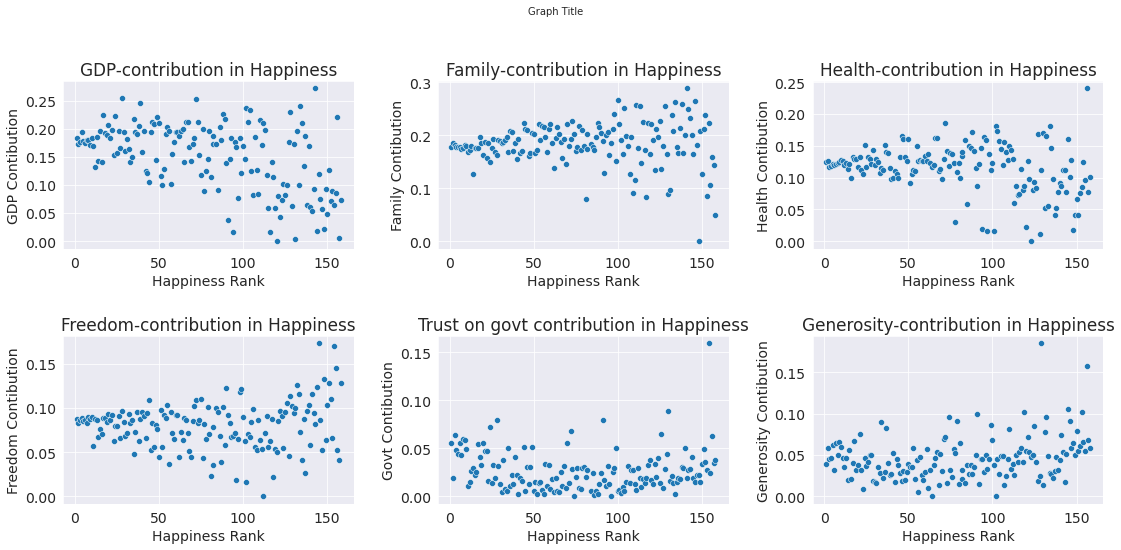

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
plt.suptitle('Graph Title', fontsize=10)

# Use the axes for plotting
axes[0,0].set_title('GDP-contribution in Happiness')
sns.scatterplot(x = workinga['Happiness-Rank'], 
                y = workinga['GDP-contri'],
               ax=axes[0,0])

axes[0,0].set_xlabel('Happiness Rank')
axes[0,0].set_ylabel('GDP Contibution')

#______________
axes[0,1].set_title('Family-contribution in Happiness')
sns.scatterplot(x = workinga['Happiness-Rank'], 
                y = workinga['Fam-contri'],
               ax=axes[0,1])

axes[0,1].set_xlabel('Happiness Rank')
axes[0,1].set_ylabel('Family Contibution')

#______________
axes[0,2].set_title('Health-contribution in Happiness')
sns.scatterplot(x = workinga['Happiness-Rank'], 
                y = workinga['Health-contri'],
               ax=axes[0,2])

axes[0,2].set_xlabel('Happiness Rank')
axes[0,2].set_ylabel('Health Contibution')

#______________

axes[1,0].set_title('Freedom-contribution in Happiness')
sns.scatterplot(x = workinga['Happiness-Rank'], 
                y = workinga['Freedom-contri'],
               ax=axes[1,0])

axes[1,0].set_xlabel('Happiness Rank')
axes[1,0].set_ylabel('Freedom Contibution')
#______________

axes[1,1].set_title('Trust on govt contribution in Happiness')
sns.scatterplot(x = workinga['Happiness-Rank'], 
                y = workinga['Govt-contri'],
               ax=axes[1,1])

axes[1,1].set_xlabel('Happiness Rank')
axes[1,1].set_ylabel('Govt Contibution')

#______________
axes[1,2].set_title('Generosity-contribution in Happiness')
sns.scatterplot(x = workinga['Happiness-Rank'], 
                y = data1_df["Generosity"]/data1_df["Happiness Score"],
               ax=axes[1,2])

axes[1,2].set_xlabel('Happiness Rank')
axes[1,2].set_ylabel('Generosity Contibution')

plt.tight_layout(pad=2);

GDP, Family, Health and Freedom contribution to the Happiness Ranking is near the same value for countries Rankig around 10. As the rank increases the values of the % contribution scatters more. Whereas there is a trend in Trust on Govt and Generosity contribution towards the happiness score. 

<b>Trust on the Govt:</b> The countries with lower ranking seems to have higher trust but which decreases and then increases with the Rank. But any comment on the reason of trend would be unjustified for the time being, so we will dig a bit deeper in it. <br>
<b>Generosity Contribution:</b> The trend is very specticle, the contribution of generosity increases as the Happiness ranks increases. In other words, the contribution of generosity in happiness of less happier countries is more than that in happy countries.

In [23]:
data1_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'GDP-contri', 'Fam-contri',
       'Health-contri', 'Freedom-contri', 'Govt-contri', 'Gen-contri',
       'Others'],
      dtype='object')

<AxesSubplot:xlabel='Happiness Rank', ylabel='Generosity'>

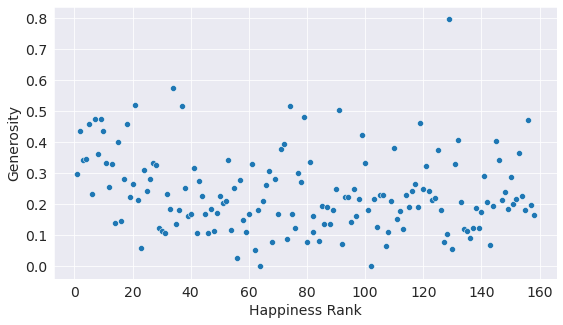

In [24]:
#sns.scatterplot(x = data1_df['Happiness Rank'], y = data1_df['Generosity'])
sns.scatterplot(x = data1_df['Happiness Rank'], y = workinga['Generosity'])

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [25]:
data1_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'GDP-contri', 'Fam-contri',
       'Health-contri', 'Freedom-contri', 'Govt-contri', 'Gen-contri',
       'Others'],
      dtype='object')

In [26]:
region_wise = data1_df.groupby('Region')[['Happiness Rank','Happiness Score','Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity','Others' ]].mean()



In [27]:
region_wise = region_wise.sort_values('Happiness Rank')

In [28]:
region_wise['Rank'] = ['1','2','3','4','5','6','7','8','9','10']
region_wise

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Others,Rank
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,0.310962,1
North America,10.000000,7.273000,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,0.341354,2
Western Europe,29.523810,6.689619,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,0.320566,3
Latin America and Caribbean,46.909091,6.144682,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,0.424590,4
Eastern Asia,64.500000,5.626167,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,0.296521,5
Middle East and Northern Africa,77.600000,5.406900,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,0.365229,6
Central and Eastern Europe,79.000000,5.332931,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,0.376850,7
Southeastern Asia,81.222222,5.317444,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,0.334208,8
Southern Asia,113.142857,4.580857,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,0.440190,9


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

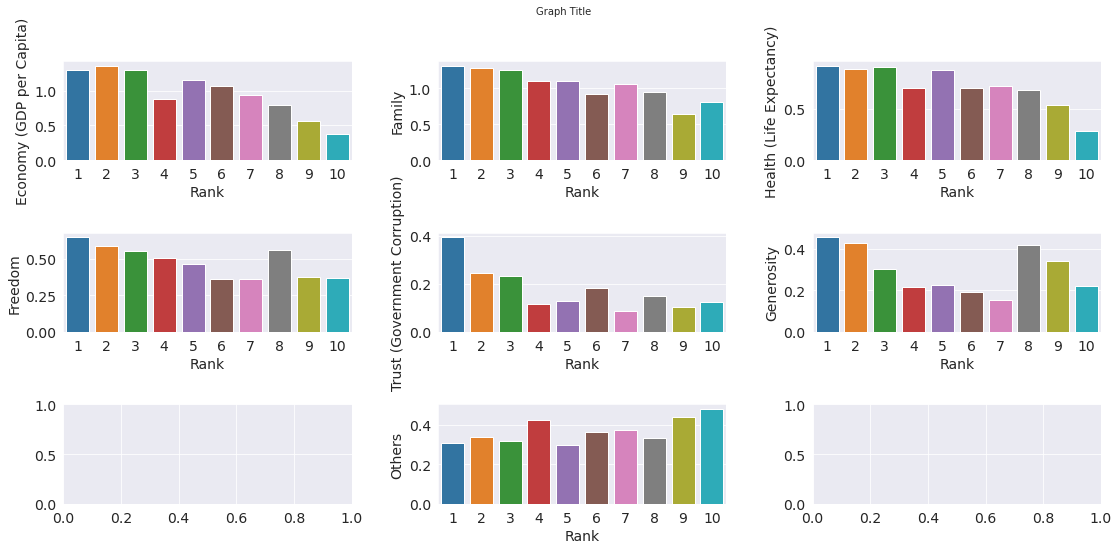

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))
plt.suptitle('Graph Title', fontsize=10)

sns.barplot(x = region_wise['Rank'], y = region_wise['Economy (GDP per Capita)'], ax = axes[0,0])
sns.barplot(x = region_wise['Rank'], y = region_wise['Family'], ax = axes[0,1])
sns.barplot(x = region_wise['Rank'], y = region_wise['Health (Life Expectancy)'], ax = axes[0,2])
sns.barplot(x = region_wise['Rank'], y = region_wise['Freedom'], ax = axes[1,0])
sns.barplot(x = region_wise['Rank'], y = region_wise['Trust (Government Corruption)'], ax = axes[1,1])
sns.barplot(x = region_wise['Rank'], y = region_wise['Generosity'], ax = axes[1,2])
sns.barplot(x = region_wise['Rank'], y = region_wise['Others'], ax = axes[2,1])

plt.tight_layout(pad=2)

Let us save and upload our work to Jovian before continuing

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jaggarwal1/contributing-to-happiness" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jaggarwal1/contributing-to-happiness


'https://jovian.ai/jaggarwal1/contributing-to-happiness'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: Which countries is at the topmost Freedom factor and majorly in which region?

In [46]:
a = data1_df.sort_values('Freedom').tail(10)
a

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,GDP-contri,Fam-contri,Health-contri,Freedom-contri,Govt-contri,Gen-contri,Others
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674,0.255698,0.163152,0.120607,0.096869,0.078971,0.049271,0.235477
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,0.206821,0.163129,0.117266,0.092968,0.055909,0.038296,0.325667
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,0.174217,0.177999,0.120053,0.086645,0.055863,0.031530,0.353706
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.176097,0.180760,0.116200,0.086273,0.064245,0.045355,0.331080
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,0.183083,0.179741,0.127891,0.089407,0.048925,0.059805,0.311156
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741,0.105354,0.223293,0.099570,0.109647,0.051351,0.038043,0.372715
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,0.180841,0.175050,0.123692,0.089598,0.059538,0.049242,0.321998
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195,0.120550,0.164273,0.160026,0.173464,0.018976,0.105679,0.257122
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.184066,0.177871,0.124085,0.087725,0.055329,0.039117,0.331802
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.193964,0.176941,0.117683,0.089036,0.048528,0.046130,0.327747


In [47]:
b = a.groupby('Region').count()
b['Country']

Region
Australia and New Zealand          1
Central and Eastern Europe         1
Middle East and Northern Africa    2
Southeastern Asia                  1
Western Europe                     5
Name: Country, dtype: int64

Clearly, <b> Western Europe </b> Countries has the best freedom scores as compared to other regions.  

#### Q2: Which countries has least trust in the government?

In [58]:
c = data1_df.sort_values('Trust (Government Corruption)').head(10)
c

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,GDP-contri,Fam-contri,Health-contri,Freedom-contri,Govt-contri,Gen-contri,Others
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399,0.153412,0.201348,0.118157,0.086333,0.000000,0.095453,0.345247
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367,0.168161,0.185726,0.159792,0.018681,0.000459,0.050127,0.416987
85,Romania,Central and Eastern Europe,86,5.124,0.06607,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748,1.93129,0.203640,0.172888,0.150059,0.068439,0.001267,0.026831,0.376911
133,Bulgaria,Central and Eastern Europe,134,4.218,0.04828,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921,0.89991,0.239962,0.262243,0.181719,0.072515,0.002067,0.028262,0.213350
55,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649,0.196679,0.215575,0.125369,0.036588,0.001768,0.004528,0.419422
87,Portugal,Western Europe,88,5.102,0.04802,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462,0.227344,0.223314,0.171539,0.100880,0.002113,0.026889,0.247868
40,Trinidad and Tobago,Latin America and Caribbean,41,6.168,0.10895,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844,2.26882,0.196470,0.191884,0.099681,0.090603,0.001848,0.051628,0.367837
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101,0.237608,0.191338,0.181620,0.015851,0.002876,0.000000,0.370807
51,Moldova,Central and Eastern Europe,52,5.889,0.03799,0.59448,1.01528,0.61826,0.32818,0.01615,0.20951,3.10712,0.100948,0.172403,0.104986,0.055728,0.002742,0.035576,0.527614
64,Jamaica,Latin America and Caribbean,65,5.709,0.13693,0.81038,1.15102,0.68741,0.50442,0.02299,0.21230,2.32038,0.141948,0.201615,0.120408,0.088355,0.004027,0.037187,0.406442


In [56]:
d = c.groupby('Region').count()
d['Country']

Region
Central and Eastern Europe     5
Latin America and Caribbean    2
Southeastern Asia              1
Western Europe                 2
Name: Country, dtype: int64

<b> Central and Eastern Europe </b> Countries has least trust on the governement.

#### Q3: What is the trend between family and freedom factor for any region?

In [88]:
region_wise

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Others,Rank
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,0.310962,1
North America,10.000000,7.273000,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,0.341354,2
Western Europe,29.523810,6.689619,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,0.320566,3
Latin America and Caribbean,46.909091,6.144682,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,0.424590,4
Eastern Asia,64.500000,5.626167,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,0.296521,5
Middle East and Northern Africa,77.600000,5.406900,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,0.365229,6
Central and Eastern Europe,79.000000,5.332931,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,0.376850,7
Southeastern Asia,81.222222,5.317444,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,0.334208,8
Southern Asia,113.142857,4.580857,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,0.440190,9


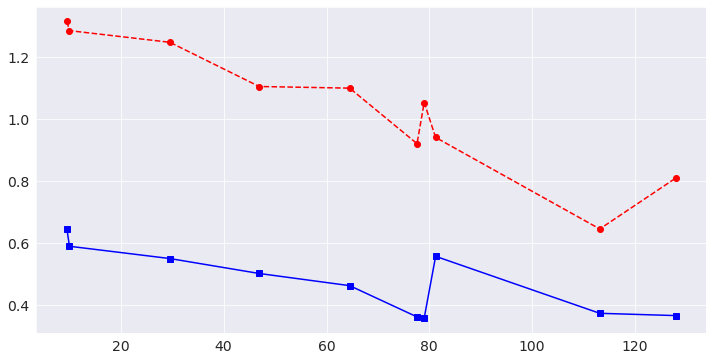

In [90]:
plt.figure(figsize=(12, 6))

plt.plot(region_wise['Happiness Rank'], region_wise['Freedom'], 's-b');
plt.plot(region_wise['Happiness Rank'], region_wise['Family'], 'o--r');

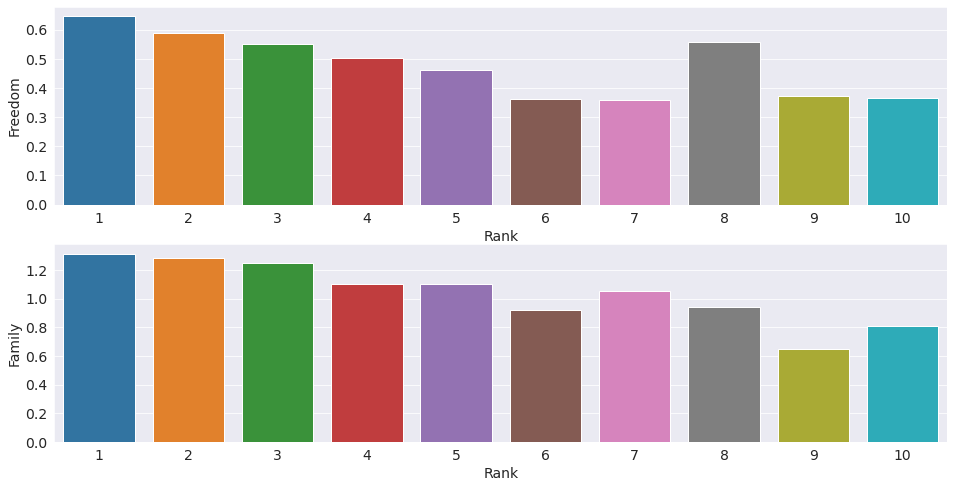

In [102]:
fig, axes = plt.subplots(2,1, figsize=(16, 8))

sns.barplot(x='Rank', y='Freedom', data=region_wise, ax = axes[0]);
sns.barplot(x='Rank', y='Family', data=region_wise, ax = axes[1]);

In [78]:
e = region_wise.corr()
e.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Others
Happiness Rank,1.000000,-0.999578,-0.989045,-0.996399,-0.986405,-0.965334,-0.958137,-0.782042,0.968290
Happiness Score,-0.999578,1.000000,0.985247,0.994208,0.982325,0.970917,0.965154,0.797148,-0.964573
Economy (GDP per Capita),-0.989045,0.985247,1.000000,0.991411,0.998055,0.927584,0.926194,0.714354,-0.985272
Family,-0.996399,0.994208,0.991411,1.000000,0.986889,0.946809,0.940332,0.736044,-0.966768
Health (Life Expectancy),-0.986405,0.982325,0.998055,0.986889,1.000000,0.931537,0.921225,0.726102,-0.991448
Freedom,-0.965334,0.970917,0.927584,0.946809,0.931537,1.000000,0.980901,0.912231,-0.930123
Trust (Government Corruption),-0.958137,0.965154,0.926194,0.940332,0.921225,0.980901,1.000000,0.894745,-0.919748
Generosity,-0.782042,0.797148,0.714354,0.736044,0.726102,0.912231,0.894745,1.000000,-0.750296
Others,0.968290,-0.964573,-0.985272,-0.966768,-0.991448,-0.930123,-0.919748,-0.750296,1.000000


<AxesSubplot:>

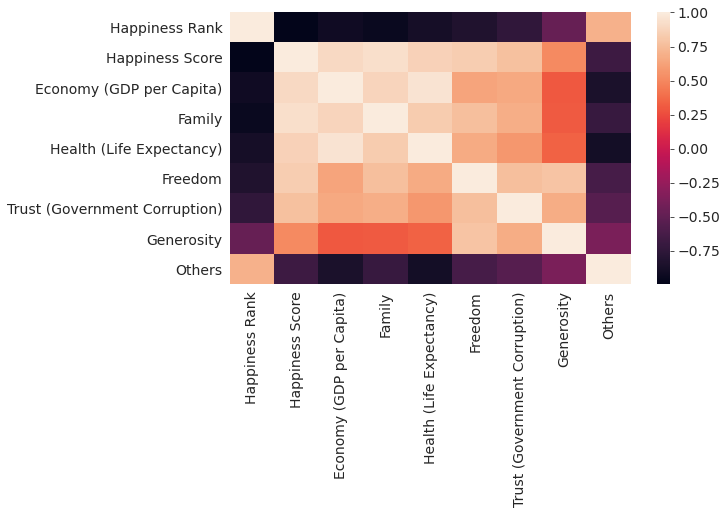

In [77]:
import seaborn as sn
sn.heatmap(e)

#### Q4: Is happiness score is equivalent to addition of all scores?


In [104]:
data1_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'GDP-contri', 'Fam-contri',
       'Health-contri', 'Freedom-contri', 'Govt-contri', 'Gen-contri',
       'Others'],
      dtype='object')

In [110]:
data1_df['Total Score']= data1_df['Family']+data1_df['Freedom']+data1_df['Economy (GDP per Capita)']+data1_df['Health (Life Expectancy)']+data1_df['Trust (Government Corruption)']+data1_df['Generosity']+data1_df['Dystopia Residual'] 

In [117]:
data1_df['Total Score'] = data1_df['Total Score'].round(3)

In [133]:
data1_df[['Total Score', 'Happiness Score']]

,Total Score,Happiness Score
0,7.587,7.587
1,7.561,7.561
2,7.527,7.527
3,7.522,7.522
4,7.427,7.427
...,...,...
153,3.465,3.465
154,3.340,3.340
155,3.006,3.006
156,2.905,2.905


#### Q5: What are the most generous countries in the world?

In [136]:
x = data1_df.sort_values('Generosity').tail(10)
x['Country']

155                Syria
8            New Zealand
6            Netherlands
78                Bhutan
90     Somaliland region
73             Indonesia
36                 Malta
20        United Kingdom
33              Thailand
128              Myanmar
Name: Country, dtype: object

Let us save and upload our work to Jovian before continuing.

In [137]:
import jovian

In [138]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jaggarwal1/contributing-to-happiness" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jaggarwal1/contributing-to-happiness


'https://jovian.ai/jaggarwal1/contributing-to-happiness'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [139]:
import jovian

In [140]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jaggarwal1/contributing-to-happiness" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jaggarwal1/contributing-to-happiness


'https://jovian.ai/jaggarwal1/contributing-to-happiness'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [141]:
import jovian

In [142]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jaggarwal1/contributing-to-happiness" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jaggarwal1/contributing-to-happiness


'https://jovian.ai/jaggarwal1/contributing-to-happiness'